<a href="https://colab.research.google.com/github/amitgupta005/regression_project/blob/main/project_housing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#pip install ydata_profiling

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/csv files/final/housing.csv')

About this file
1. longitude: A measure of how far west a house is; a higher value is farther west
2. latitude: A measure of how far north a house is; a higher value is farther north
3. housingMedianAge: Median age of a house within a block; a lower number is a newer building
4. totalRooms: Total number of rooms within a block
5. totalBedrooms: Total number of bedrooms within a block
6. population: Total number of people residing within a block
7. households: Total number of households, a group of people residing within a home unit, for a block
8. medianIncome: Median income for households within a block of houses (measured in tens of thousands of US Dollars)
9. medianHouseValue: Median house value for households within a block (measured in US Dollars)
10. oceanProximity: Location of the house w.r.t ocean/sea

In [ ]:
df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [ ]:
df.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [ ]:
df.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity'],
      dtype='object')

In [ ]:
df.shape

(20640, 10)

In [ ]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [ ]:
df.dtypes

longitude             float64
latitude              float64
housing_median_age    float64
total_rooms           float64
total_bedrooms        float64
population            float64
households            float64
median_income         float64
median_house_value    float64
ocean_proximity        object
dtype: object

In [ ]:
df["ocean_proximity"].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

## **Univariate EDA**

In [ ]:
data = df.copy(deep = True)

array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

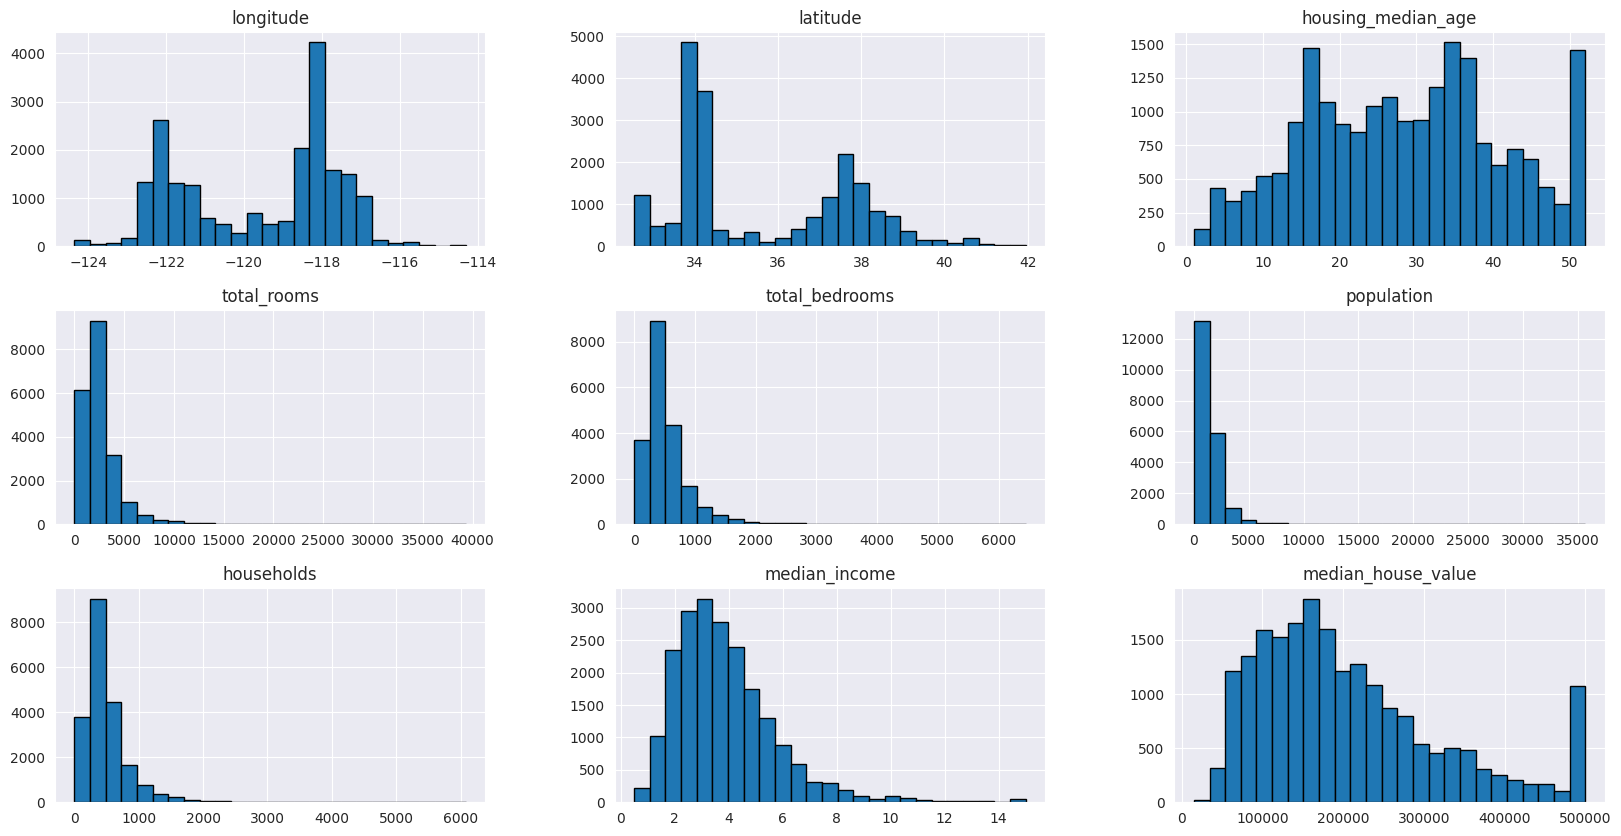

In [ ]:
sns.set_style('darkgrid')
data.hist(bins =25, edgecolor = 'black', figsize = (20,10))

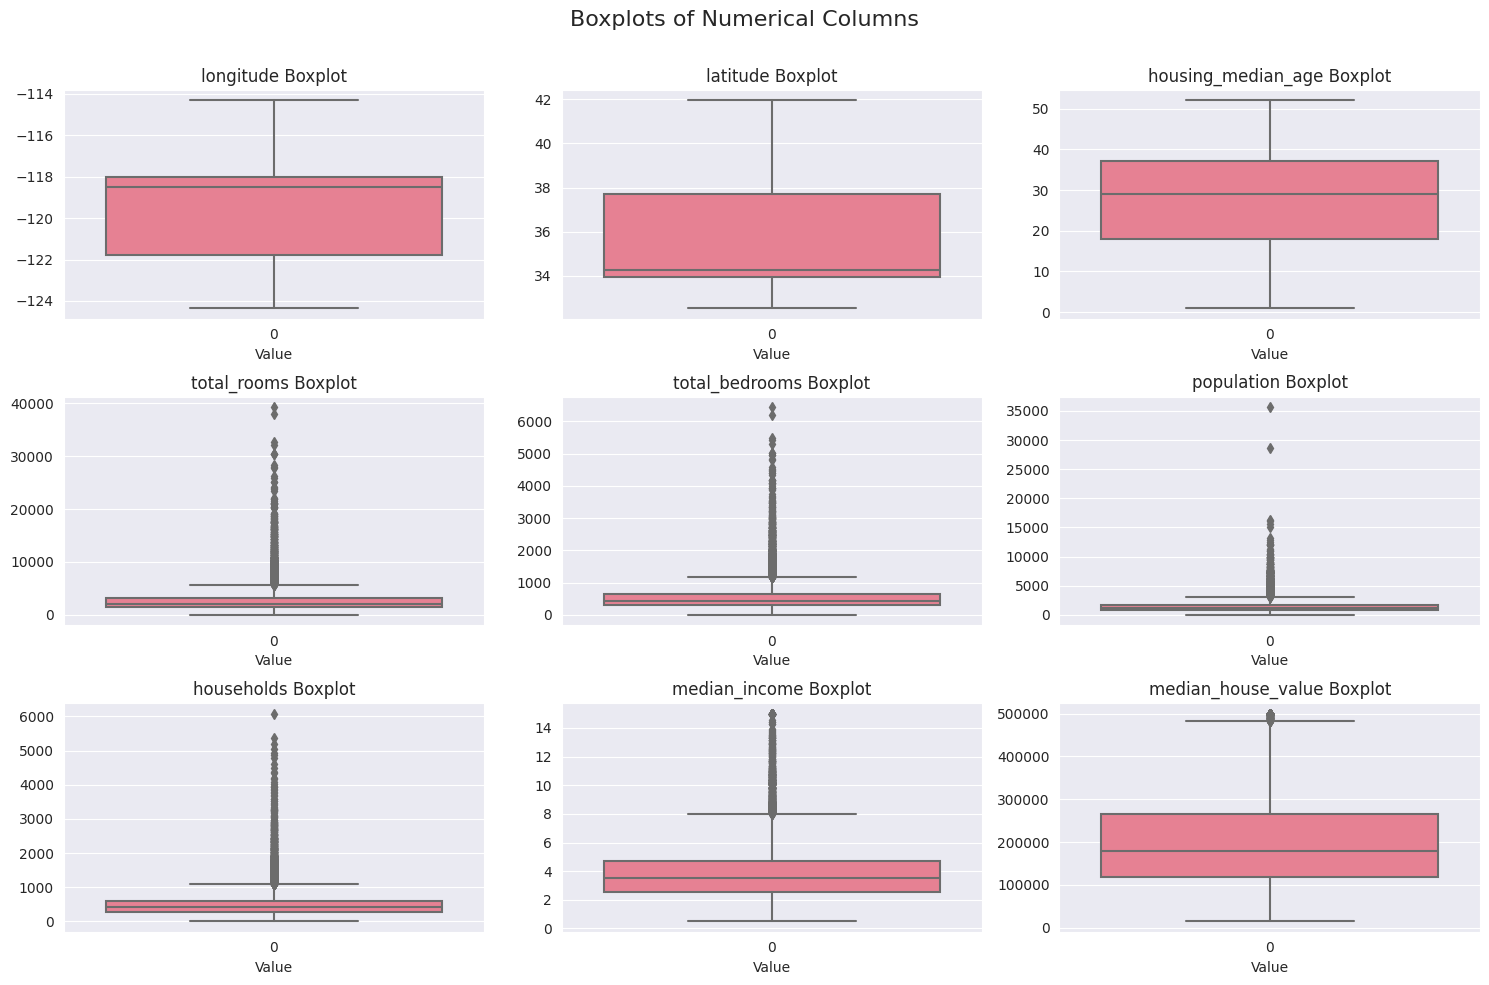

In [ ]:
# Select numerical columns
numerical_columns = data.select_dtypes(include=['float64'])

# Define the number of rows and columns for subplots
num_rows = (len(numerical_columns.columns) + 2) // 3  # Adjust the number of columns as needed
num_cols = 3  # You can change this to the desired number of columns per row

# Create subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 10))
fig.suptitle("Boxplots of Numerical Columns", fontsize=16)

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Iterate through numerical columns and create boxplots
for i, col in enumerate(numerical_columns.columns):
    sns.boxplot(data=numerical_columns[col], ax=axes[i], palette="husl")
    axes[i].set_title(f"{col} Boxplot")
    axes[i].set_xlabel("Value")

# Remove empty subplots if the number of columns is not a multiple of 3
if len(numerical_columns.columns) % 3 != 0:
    for i in range(len(numerical_columns.columns), num_rows * num_cols):
        fig.delaxes(axes[i])

plt.tight_layout()
plt.subplots_adjust(top=0.9)  # Adjust the title position
plt.show()

In [ ]:
df['ocean_proximity'].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

In [ ]:
data['housing_median_age'].value_counts()

52.0    1273
36.0     862
35.0     824
16.0     771
17.0     698
34.0     689
26.0     619
33.0     615
18.0     570
25.0     566
32.0     565
37.0     537
15.0     512
19.0     502
27.0     488
24.0     478
30.0     476
28.0     471
20.0     465
29.0     461
31.0     458
23.0     448
21.0     446
14.0     412
22.0     399
38.0     394
39.0     369
42.0     368
44.0     356
43.0     353
40.0     304
13.0     302
41.0     296
45.0     294
10.0     264
11.0     254
46.0     245
5.0      244
12.0     238
8.0      206
9.0      205
47.0     198
4.0      191
48.0     177
7.0      175
6.0      160
50.0     136
49.0     134
3.0       62
2.0       58
51.0      48
1.0        4
Name: housing_median_age, dtype: int64

In [ ]:
data['median_house_value'].value_counts()

500001.0    965
137500.0    122
162500.0    117
112500.0    103
187500.0     93
           ... 
359200.0      1
54900.0       1
377600.0      1
81200.0       1
47000.0       1
Name: median_house_value, Length: 3842, dtype: int64

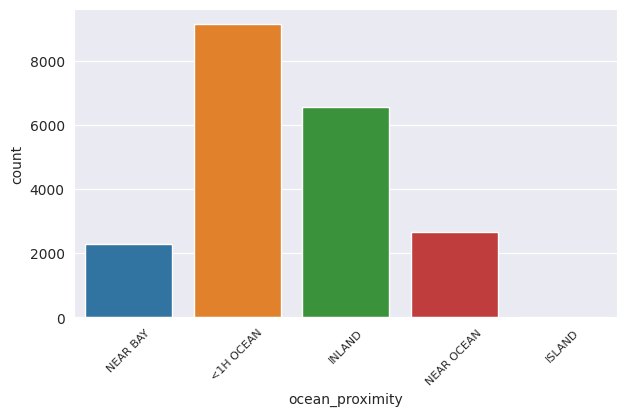

In [ ]:
plt.figure(figsize=(7,4))
sns.countplot(data=df,x='ocean_proximity')

# Adjust the font size and rotation of x-axis labels
plt.xticks(fontsize=8, rotation=45)
plt.show()

# **BIVARIATE EDA**

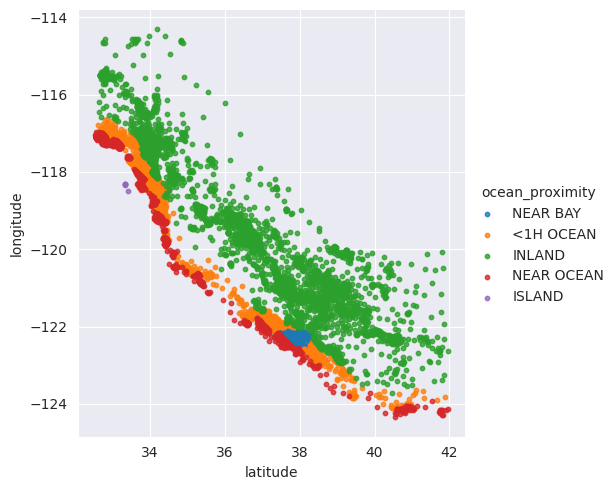

In [ ]:
sns.lmplot(data = data, x = 'latitude', y = 'longitude', hue = "ocean_proximity", fit_reg = False, legend = True,scatter_kws={'s': 10, 'marker': 'o'})
plt.show()

<ipython-input-19-eb3f48ee27b1>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap( data.corr().abs(), annot = True, cmap = 'coolwarm')


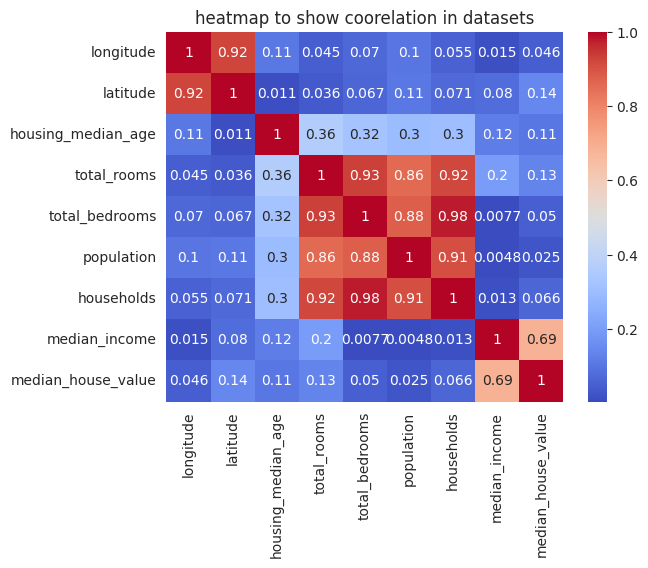

In [ ]:
sns.heatmap( data.corr().abs(), annot = True, cmap = 'coolwarm')
plt.title("heatmap to show coorelation in datasets")
plt.show()
## we observe that there are certain columns in the data which has high collinearity which can give rise to multicollinearity in the data

## longitude and latitude are highly correlated with 0.92
## total rooms and total bedrooms also have high collinearity
## population and no. of household also have high collinearity

In [ ]:
data.corr()["median_house_value"].sort_values().abs()

<ipython-input-20-9c92314285f5>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.corr()["median_house_value"].sort_values().abs()


latitude              0.144160
longitude             0.045967
population            0.024650
total_bedrooms        0.049686
households            0.065843
housing_median_age    0.105623
total_rooms           0.134153
median_income         0.688075
median_house_value    1.000000
Name: median_house_value, dtype: float64

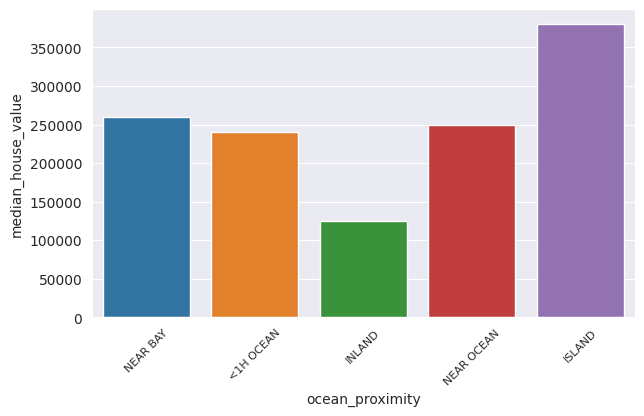

In [ ]:
plt.figure(figsize=(7,4))
sns.barplot(data=df,x='ocean_proximity', y='median_house_value',errorbar=None)

# Adjust the font size and rotation of x-axis labels
plt.xticks(fontsize=8, rotation=45)
plt.show()

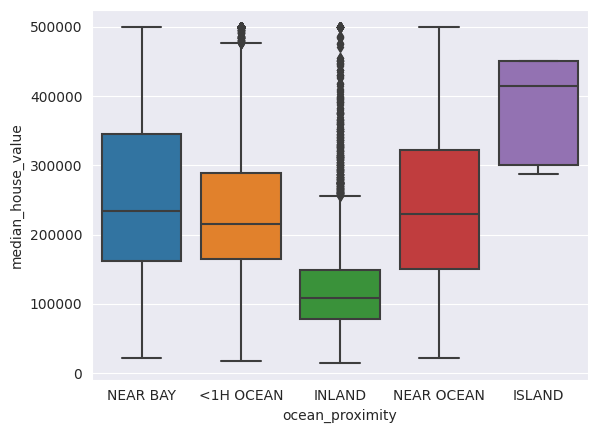

In [ ]:
# boxplot of median house value vs ocean proximity
sns.set_style('darkgrid')
sns.boxplot( x = 'ocean_proximity', y = 'median_house_value', data = data)
plt.show()
# we observe that houses on inland has the lowest value but also contains a large number of outliers
# the island is itself an outlier because it has a count of only five as compared to other category of ocean proximity

<ipython-input-23-2d0e78735fad>:17: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x=col, y = 'median_house_value', data = numerical_columns,size = 10, ax=axes[i], palette="husl")
<ipython-input-23-2d0e78735fad>:17: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x=col, y = 'median_house_value', data = numerical_columns,size = 10, ax=axes[i], palette="husl")
<ipython-input-23-2d0e78735fad>:17: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x=col, y = 'median_house_value', data = numerical_columns,size = 10, ax=axes[i], palette="husl")
<ipython-input-23-2d0e78735fad>:17: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x=col, y = 'median_house_value', data = numerical_columns,size = 10, ax=axes[i], palette="husl")
<ipython-input-23-2d0e78735fad>:17: UserWarning: Ignoring `palette` because no `hue` var

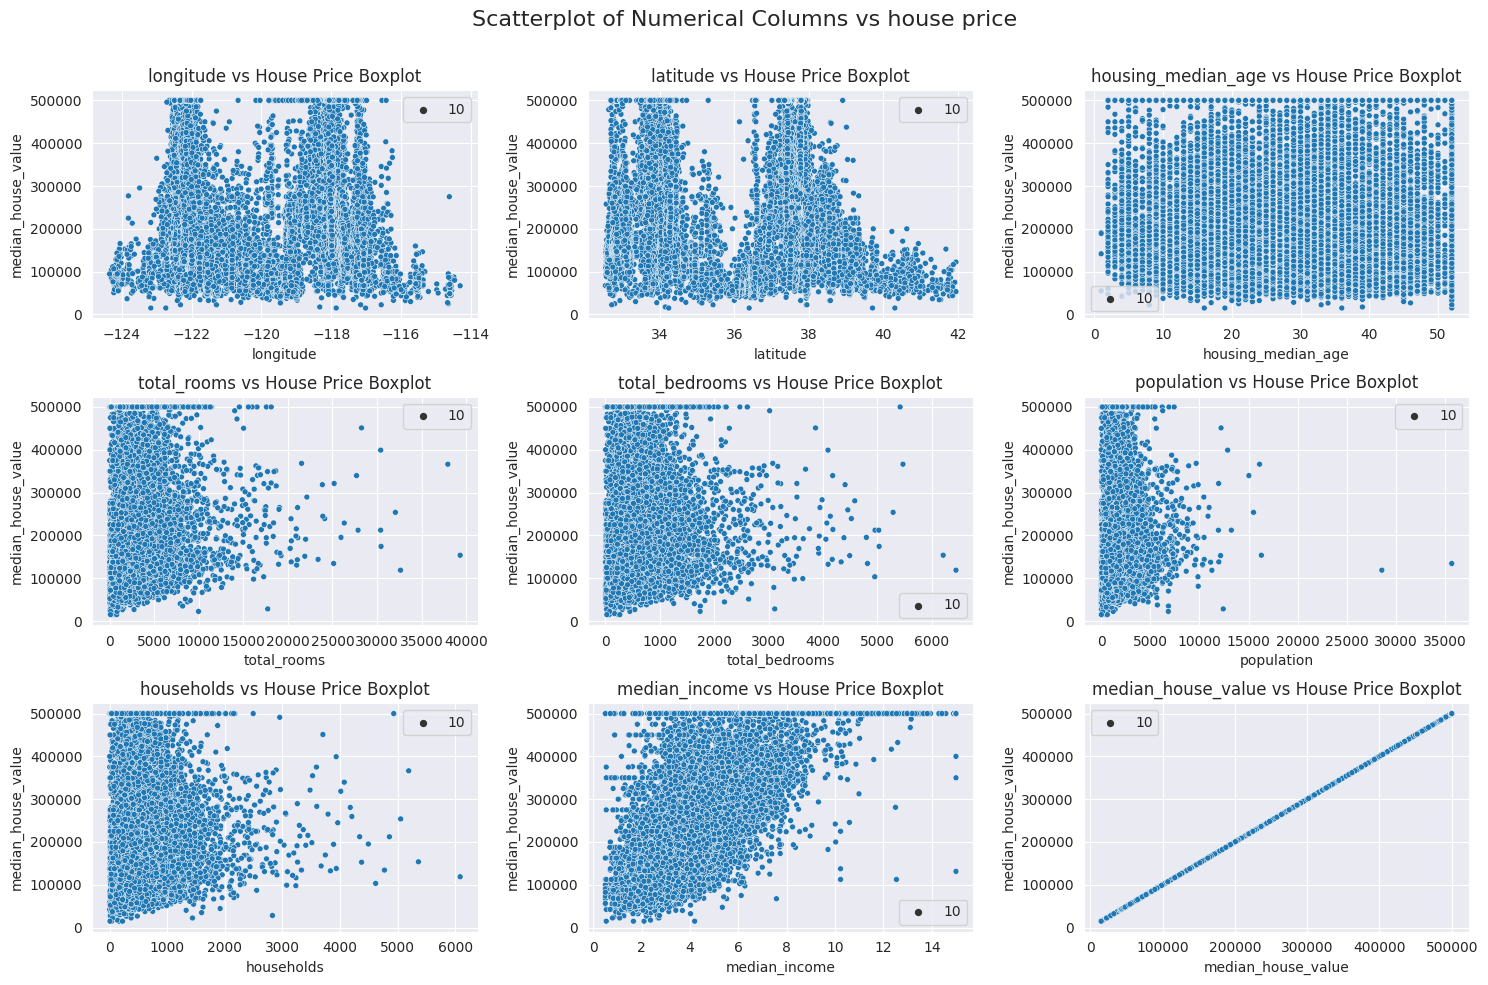

In [ ]:
# Select numerical columns
numerical_columns = data.select_dtypes(include=['float64'])

# Define the number of rows and columns for subplots
num_rows = (len(numerical_columns.columns) + 2) // 3  # Adjust the number of columns as needed
num_cols = 3  # You can change this to the desired number of columns per row

# Create subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 10))
fig.suptitle("Scatterplot of Numerical Columns vs house price", fontsize=16)

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Iterate through numerical columns and create boxplots
for i, col in enumerate(numerical_columns.columns):
    sns.scatterplot(x=col, y = 'median_house_value', data = numerical_columns,size = 10, ax=axes[i], palette="husl")
    axes[i].set_title(f"{col} vs House Price Boxplot")
    axes[i].set_xlabel(f"{col}")

# Remove empty subplots if the number of columns is not a multiple of 3
if len(numerical_columns.columns) % 3 != 0:
    for i in range(len(numerical_columns.columns), num_rows * num_cols):
        fig.delaxes(axes[i])

plt.tight_layout()
plt.subplots_adjust(top=0.9)  # Adjust the title position
plt.show()

# **DATA CLEANING AND PREPROCESSING**

In [ ]:
# first fill the null values in total_bedrooms
# we impute the value of mean in place of null values
data["total_bedrooms"].fillna(data['total_bedrooms'].mean(), inplace = True)
data.isnull().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
dtype: int64

In [ ]:
data.drop_duplicates()
#there are no duplicates in the data
data.shape

(20640, 10)

In [ ]:
data1 = data.copy(deep=True)

In [ ]:
# Function to identify rows with outliers
def has_outliers(series, threshold):
    q1 = series.quantile(0.25)
    q3 = series.quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - threshold * iqr
    upper_bound = q3 + threshold * iqr
    return (series < lower_bound) | (series > upper_bound)

In [ ]:
# Define a function to remove outliers based on IQR
def remove_outliers(df, columns, threshold):
    cleaned_df = df.copy()  # Create a copy of the original DataFrame
    for col in columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - threshold * IQR
        upper_bound = Q3 + threshold * IQR
        cleaned_df = cleaned_df[(cleaned_df[col] >= lower_bound) & (cleaned_df[col] <= upper_bound)]
    return cleaned_df

In [ ]:
## create new features to take care of multicollinearity issue
data1['rooms_per_bedroom'] = data['total_rooms'] / data['total_bedrooms']
data1['population_per_household'] = data['population'] / data['households']
data1.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,rooms_per_bedroom,population_per_household
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY,6.821705,2.555556
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY,6.418626,2.109842
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY,7.721053,2.802260
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY,5.421277,2.547945
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY,5.810714,2.181467


In [ ]:
# Since latitude and longitude are highly correlated, we combine these two variables to new variable called distance from centroid
# Calculate the centroid (mean) of latitude and longitude
centroid_lat = data1['latitude'].mean()
centroid_long = data1['longitude'].mean()

# Calculate the Euclidean distance from the centroid for each data point
data1['distance_from_centroid'] = np.sqrt((data1['latitude'] - centroid_lat)**2 + (data1['longitude'] - centroid_long)**2)
data1.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,rooms_per_bedroom,population_per_household,distance_from_centroid
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY,6.821705,2.555556,3.483001
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY,6.418626,2.109842,3.462466
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY,7.721053,2.802260,3.471400
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY,5.421277,2.547945,3.479098
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY,5.810714,2.181467,3.479098


In [ ]:
data1 = data1.drop(['longitude', 'latitude', 'total_rooms', 'total_bedrooms', 'population', 'households' ], axis = 1)

In [ ]:
data1.columns

Index(['housing_median_age', 'median_income', 'median_house_value',
       'ocean_proximity', 'rooms_per_bedroom', 'population_per_household',
       'distance_from_centroid'],
      dtype='object')

In [ ]:
columns_to_check = ['median_income','median_house_value', 'housing_median_age', 'rooms_per_bedroom', 'population_per_household']
data1 = remove_outliers(data1, columns_to_check, 3)
data1.shape

(20360, 7)

In [ ]:
data1.head()

,housing_median_age,median_income,median_house_value,ocean_proximity,rooms_per_bedroom,population_per_household,distance_from_centroid
0,41.0,8.3252,452600.0,NEAR BAY,6.821705,2.555556,3.483001
1,21.0,8.3014,358500.0,NEAR BAY,6.418626,2.109842,3.462466
2,52.0,7.2574,352100.0,NEAR BAY,7.721053,2.802260,3.471400
3,52.0,5.6431,341300.0,NEAR BAY,5.421277,2.547945,3.479098
4,52.0,3.8462,342200.0,NEAR BAY,5.810714,2.181467,3.479098


In [ ]:
#pp.ProfileReport(data1)

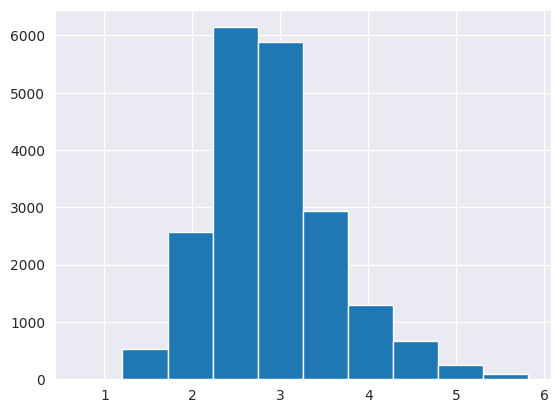

,housing_median_age,median_income,median_house_value,ocean_proximity,rooms_per_bedroom,population_per_household,distance_from_centroid
0,41.0,8.3252,452600.0,NEAR BAY,6.821705,2.555556,3.483001
1,21.0,8.3014,358500.0,NEAR BAY,6.418626,2.109842,3.462466
2,52.0,7.2574,352100.0,NEAR BAY,7.721053,2.802260,3.471400
3,52.0,5.6431,341300.0,NEAR BAY,5.421277,2.547945,3.479098
4,52.0,3.8462,342200.0,NEAR BAY,5.810714,2.181467,3.479098
...,...,...,...,...,...,...,...
20635,25.0,1.5603,78100.0,INLAND,4.451872,2.560606,4.137568
20636,18.0,2.5568,77100.0,INLAND,4.646667,3.122807,4.192350
20637,17.0,1.7000,92300.0,INLAND,4.647423,2.325635,4.141175
20638,18.0,1.8672,84700.0,INLAND,4.547677,2.123209,4.182032


In [ ]:
plt.hist(data1['population_per_household'])
plt.show()
data1['population_per_household'].describe()
data1

In [ ]:
data1 = data1.reset_index(drop = True)
data1

,housing_median_age,median_income,median_house_value,ocean_proximity,rooms_per_bedroom,population_per_household,distance_from_centroid
0,41.0,8.3252,452600.0,NEAR BAY,6.821705,2.555556,3.483001
1,21.0,8.3014,358500.0,NEAR BAY,6.418626,2.109842,3.462466
2,52.0,7.2574,352100.0,NEAR BAY,7.721053,2.802260,3.471400
3,52.0,5.6431,341300.0,NEAR BAY,5.421277,2.547945,3.479098
4,52.0,3.8462,342200.0,NEAR BAY,5.810714,2.181467,3.479098
...,...,...,...,...,...,...,...
20355,25.0,1.5603,78100.0,INLAND,4.451872,2.560606,4.137568
20356,18.0,2.5568,77100.0,INLAND,4.646667,3.122807,4.192350
20357,17.0,1.7000,92300.0,INLAND,4.647423,2.325635,4.141175
20358,18.0,1.8672,84700.0,INLAND,4.547677,2.123209,4.182032


<ipython-input-38-33c339b91974>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap( data1.corr(), annot = True, cmap = 'coolwarm')


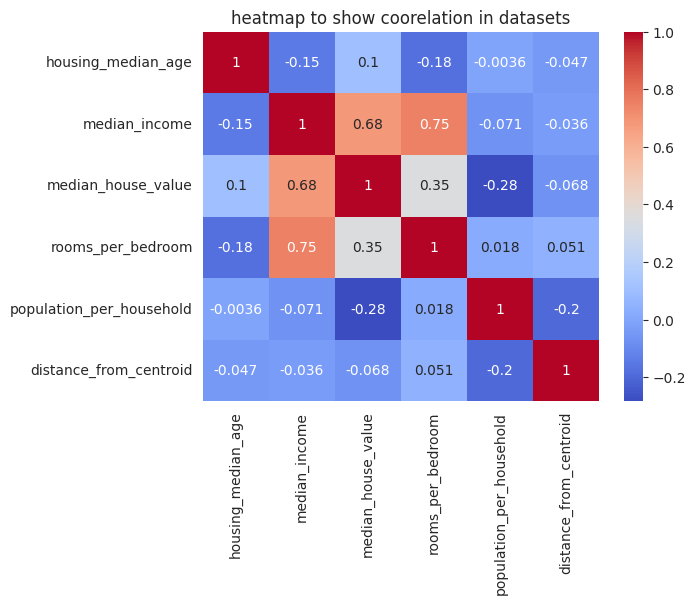

In [ ]:
sns.heatmap( data1.corr(), annot = True, cmap = 'coolwarm')
plt.title("heatmap to show coorelation in datasets")
plt.show()

In [ ]:
data2 = data1[(data1['median_house_value']<500001) & (data1['housing_median_age']<52)]
data2 = data2.reset_index(drop = True)

<ipython-input-40-57ea402852fb>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap( data2.corr().abs(), annot = True, cmap = 'coolwarm')


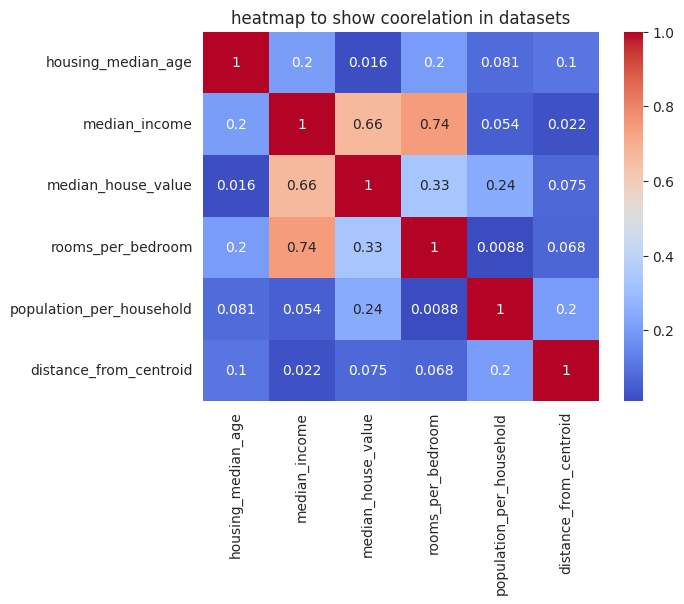

In [ ]:
sns.heatmap( data2.corr().abs(), annot = True, cmap = 'coolwarm')
plt.title("heatmap to show coorelation in datasets")
plt.show()

In [ ]:
data3 = data1[(data1['median_house_value']>=500001) | (data1['housing_median_age']>=52)]

<ipython-input-42-4b2e54a99eb4>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap( data3.corr(), annot = True, cmap = 'coolwarm')


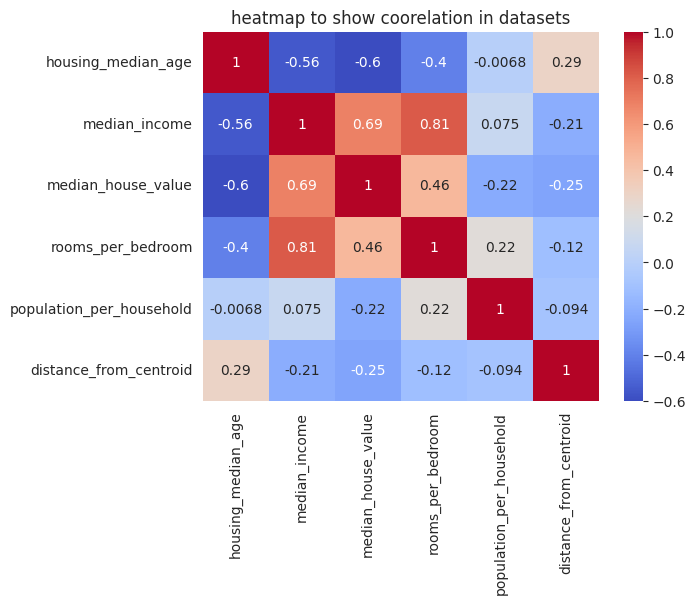

In [ ]:
sns.heatmap( data3.corr(), annot = True, cmap = 'coolwarm')
plt.title("heatmap to show coorelation in datasets")
plt.show()

# Model Fitting 1

In [ ]:
# Select numerical columns
numerical_columns = data1.select_dtypes(include=['float64'])
numerical_columns = numerical_columns.drop(['median_house_value'], axis = 1)
numerical_columns.head()

,housing_median_age,median_income,rooms_per_bedroom,population_per_household,distance_from_centroid
0,41.0,8.3252,6.821705,2.555556,3.483001
1,21.0,8.3014,6.418626,2.109842,3.462466
2,52.0,7.2574,7.721053,2.802260,3.471400
3,52.0,5.6431,5.421277,2.547945,3.479098
4,52.0,3.8462,5.810714,2.181467,3.479098


In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
numerical_columns_scaled = scaler.fit_transform(numerical_columns)
df1 = pd.DataFrame(numerical_columns_scaled)
df1.head()
df1.shape

(20360, 5)

In [ ]:
df1['ocean'] = data1['ocean_proximity']

In [ ]:
df1 = pd.get_dummies(df1, columns = ['ocean'], drop_first = True)
df1.head()
df1.columns

Index([                 0,                  1,                  2,
                        3,                  4,     'ocean_INLAND',
           'ocean_ISLAND',   'ocean_NEAR BAY', 'ocean_NEAR OCEAN'],
      dtype='object')

In [ ]:
df1 = df1.rename(columns={0: 'housing_median_age', 1: 'median_income', 2 : 'rooms_per_bedroom', 3 : 'population_per_household', 4 : 'distance_from_centroid' })
df1.columns

Index(['housing_median_age', 'median_income', 'rooms_per_bedroom',
       'population_per_household', 'distance_from_centroid', 'ocean_INLAND',
       'ocean_ISLAND', 'ocean_NEAR BAY', 'ocean_NEAR OCEAN'],
      dtype='object')

In [ ]:
X = df1
Y = data1['median_house_value']
Y.shape

(20360,)

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size = 0.3, random_state=42)
model1 = LinearRegression()
model1.fit(X_train, Y_train)

LinearRegression()

In [ ]:
coefficients = model1.coef_
intercept = model1.intercept_
print("coefficients are ", coefficients)
print("intercept is ", intercept)

coefficients are  [  54398.19604952  509725.28675801 -133277.33196388 -190411.34009984
  -69339.06595426  -62372.06091637  163837.07110807    5102.74415693
   12284.77548067]
intercept is  204002.1203950126


In [ ]:
# now we calculate the MSE and R^2 to evaluate the efficeiency of our model
mse1 = mean_squared_error(Y_train, model1.predict(X_train))
R2a = r2_score(Y_train, model1.predict(X_train))
print(f" R squared for trained data is {R2a} and MSE is {mse1}")
mse2 = mean_squared_error(Y_test, model1.predict(X_test))
R2b = r2_score(Y_test, model1.predict(X_test))
print(f" R squared for test data is {R2b} and MSE is {mse2}")

 R squared for trained data is 0.6655718689368558 and MSE is 4272847670.133697
 R squared for test data is 0.6486059980303995 and MSE is 4594445080.069142


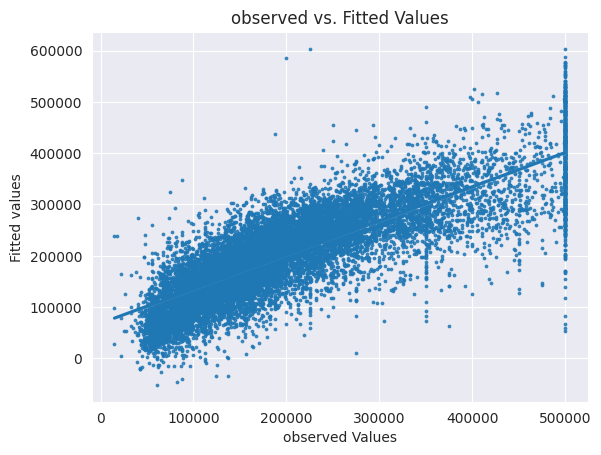

In [ ]:
sns.regplot(x = Y_train, y = model1.predict(X_train), scatter_kws={'s': 3} )
plt.xlabel("observed Values")
plt.ylabel("Fitted values")
plt.title("observed vs. Fitted Values")
plt.show()

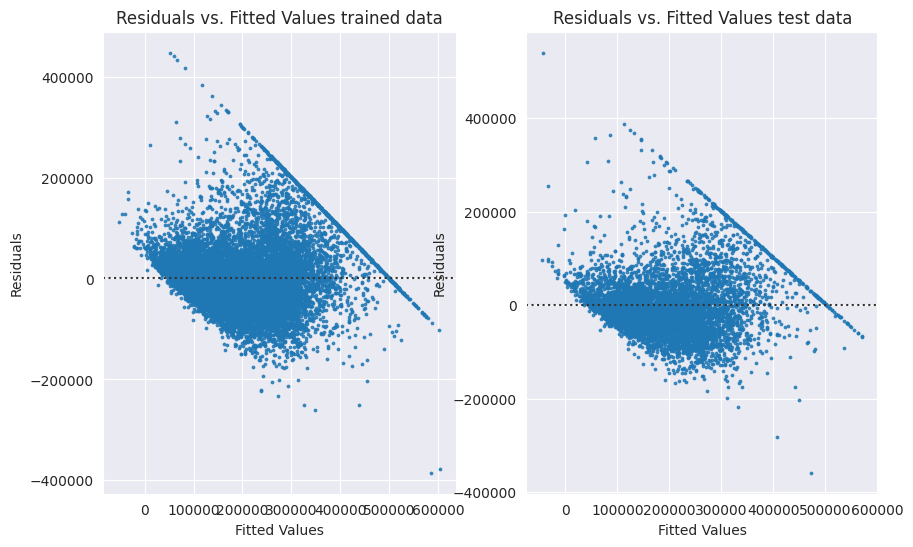

1.3592134122931485e-11
457.9594259563763


In [ ]:
residuals1 = Y_train - model1.predict(X_train)
residuals2 = Y_test - model1.predict(X_test)
plt.figure(figsize = (10,6))
plt.subplot(1,2,1)
sns.residplot(x= model1.predict(X_train), y= residuals1, scatter_kws={'s': 3})
plt.xlabel("Fitted Values")
plt.ylabel("Residuals")
plt.title("Residuals vs. Fitted Values trained data")
plt.subplot(1,2,2)
sns.residplot(x= model1.predict(X_test), y= residuals2, scatter_kws={'s': 3})
plt.xlabel("Fitted Values")
plt.ylabel("Residuals")
plt.title("Residuals vs. Fitted Values test data")
plt.show()
print(residuals1.mean())
print(residuals2.mean())

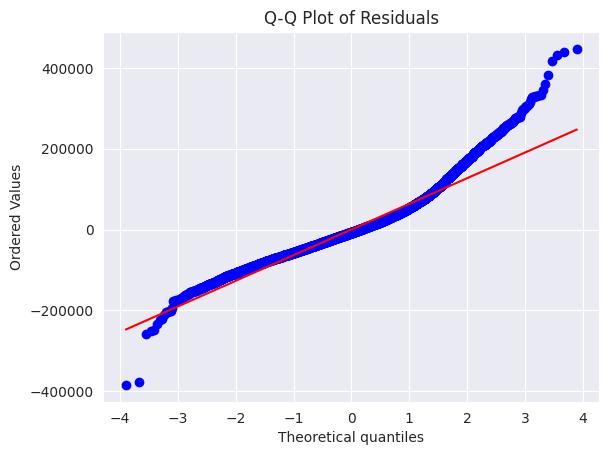

In [ ]:
from scipy.stats import probplot

probplot(residuals1, dist="norm", plot=plt)
plt.title("Q-Q Plot of Residuals")
plt.show()

Since from the qq plot we can infer that the data is positively skewed.
We will now use boxcox transformation to transform Y into normal distribution

# **Model fitting 2**

In [ ]:
from scipy.stats import boxcox
Y_transformed, lambda_value = boxcox(Y)

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y_transformed,test_size = 0.3, random_state=4)
model2 = LinearRegression()
model2.fit(X_train, Y_train)

LinearRegression()

In [ ]:
# now we calculate the MSE and R^2 to evaluate the efficeiency of our model
mse1 = mean_squared_error(Y_train, model2.predict(X_train))
R2a = r2_score(Y_train, model2.predict(X_train))
print(f" R squared for trained data is {R2a} and MSE is {mse1}")
mse2 = mean_squared_error(Y_test, model2.predict(X_test))
R2b = r2_score(Y_test, model2.predict(X_test))
print(f" R squared for test data is {R2b} and MSE is {mse2}")

 R squared for trained data is 0.6896431082376018 and MSE is 2.3895904853724854
 R squared for test data is 0.6798960280670414 and MSE is 2.5071867888131023


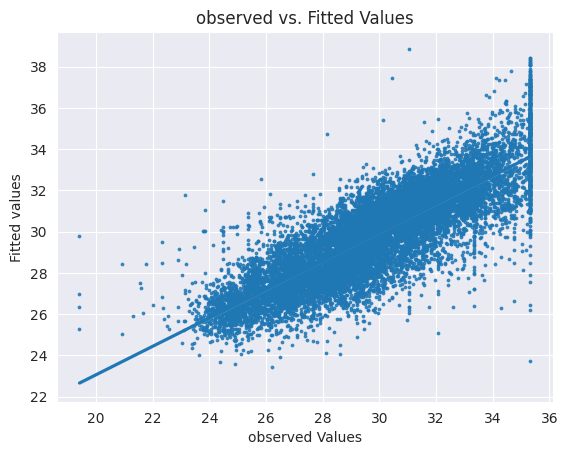

In [ ]:
sns.regplot(x = Y_train, y = model2.predict(X_train), scatter_kws={'s': 3} )
plt.xlabel("observed Values")
plt.ylabel("Fitted values")
plt.title("observed vs. Fitted Values")
plt.show()

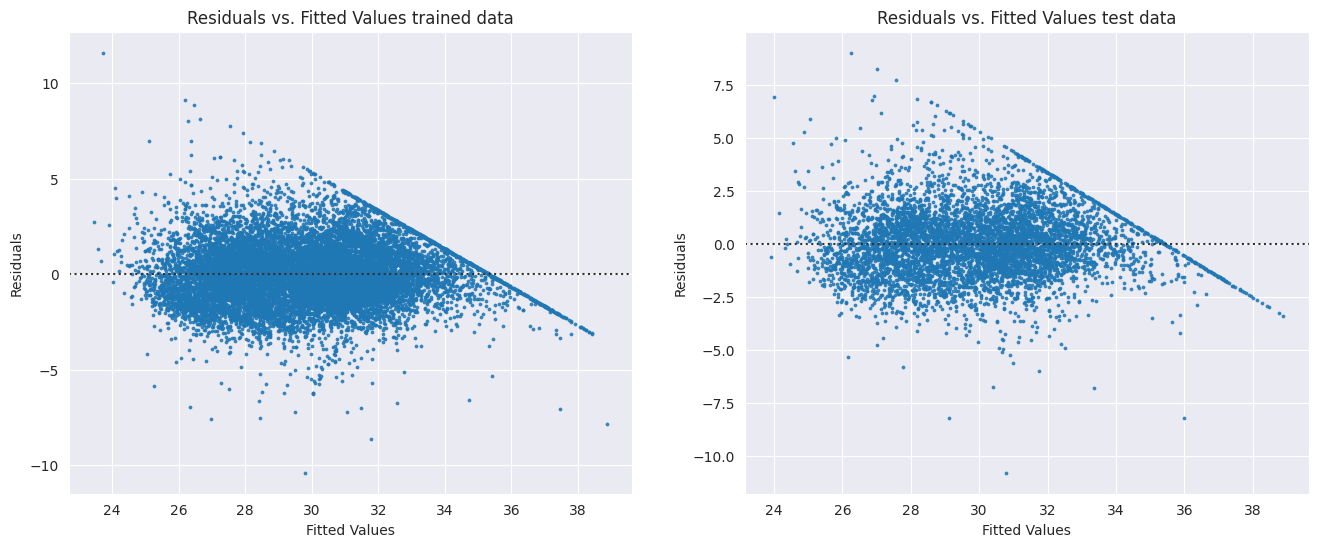

3.491889784776692e-15
0.009245201450460061


In [ ]:
residuals1 = Y_train - model2.predict(X_train)
residuals2 = Y_test - model2.predict(X_test)
plt.figure(figsize = (16,6))
plt.subplot(1,2,1)
sns.residplot(x= model2.predict(X_train), y= residuals1, scatter_kws={'s': 3})
plt.xlabel("Fitted Values")
plt.ylabel("Residuals")
plt.title("Residuals vs. Fitted Values trained data")
plt.subplot(1,2,2)
sns.residplot(x= model2.predict(X_test), y= residuals2, scatter_kws={'s': 3})
plt.xlabel("Fitted Values")
plt.ylabel("Residuals")
plt.title("Residuals vs. Fitted Values test data")
plt.show()
print(residuals1.mean())
print(residuals2.mean())

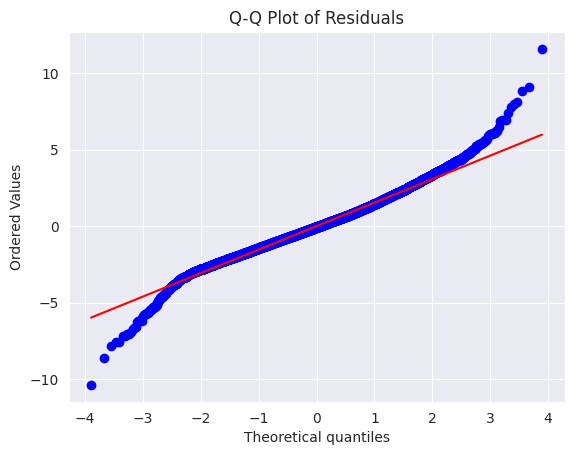

In [ ]:
from scipy.stats import probplot

probplot(residuals1, dist="norm", plot=plt)
plt.title("Q-Q Plot of Residuals")
plt.show()

<Axes: ylabel='Density'>

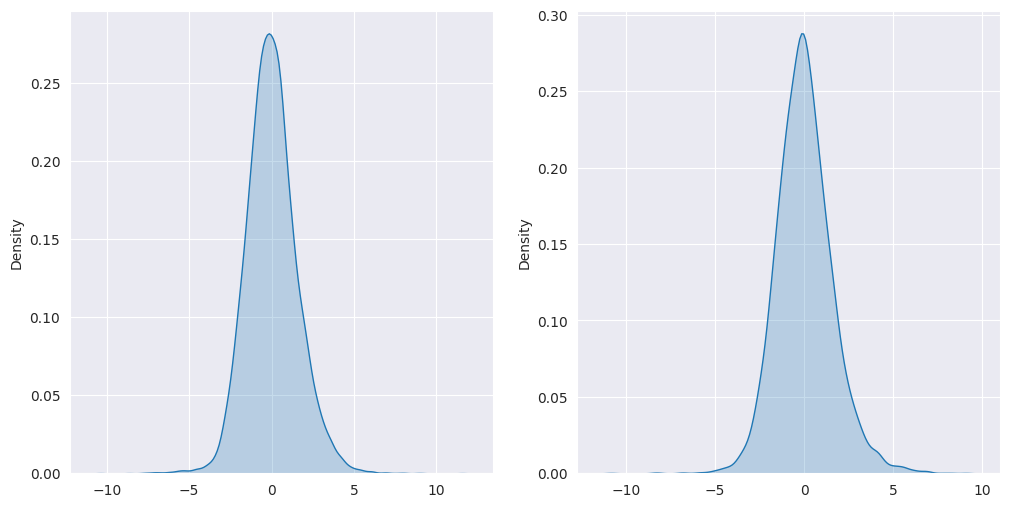

In [ ]:
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
sns.kdeplot(residuals1, fill = True)
plt.subplot(1,2,2)
sns.kdeplot(residuals2, fill = True)

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Example: Calculate VIF values for each variable
vif = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif

[5.41815291998149,
 14.332370234263918,
 39.982280520166405,
 8.66450480305649,
 7.177023872216048,
 2.2634667936269697,
 1.0010776408362458,
 1.4859737294413204,
 1.3806060089749312]

# Cook's statistic for influential observation

In [ ]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import OLSInfluence
data4 = pd.get_dummies(data1, columns = ['ocean_proximity'], drop_first = True)

In [ ]:
X = data4.drop(['median_house_value'], axis = 1)  # Independent variable
y = data4['median_house_value']  # Dependent variable

X = sm.add_constant(X)  # Add a constant term (intercept)

model = sm.OLS(y, X).fit()
X.head()
X.shape

(20360, 10)

In [ ]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:     median_house_value   R-squared:                       0.660
Model:                            OLS   Adj. R-squared:                  0.660
Method:                 Least Squares   F-statistic:                     4399.
Date:                Fri, 06 Oct 2023   Prob (F-statistic):               0.00
Time:                        10:42:13   Log-Likelihood:            -2.5486e+05
No. Observations:               20360   AIC:                         5.097e+05
Df Residuals:                   20350   BIC:                         5.098e+05
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const                       2.132e+05   3527.359     60.428      0.000    2.06e+05     2.2e+05
housing_median_age          1024.7344     40.112     25.547      0.000     946.111    1103.357
median_income               4.729e+04    470.592    100.484      0.000    4.64e+04    4.82e+04
rooms_per_bedroom          -1.354e+04    670.342    -20.201      0.000   -1.49e+04   -1.22e+04
population_per_household   -3.738e+04    679.270    -55.029      0.000   -3.87e+04    -3.6e+04
distance_from_centroid     -8954.2954    496.753    -18.026      0.000   -9927.971   -7980.620
ocean_proximity_INLAND     -6.202e+04   1240.887    -49.979      0.000   -6.45e+04   -5.96e+04
ocean_proximity_ISLAND      1.563e+05   2.96e+04      5.283      0.000    9.83e+04    2.14e+05
ocean_proximity_NEAR BAY    6699.4511   1698.225      3.945      0.000    3370.793       1e+04
ocean_proximity_NEAR OCEAN  1.398e+04   1525.222      9.166      0.000     1.1e+04     1.7e+04
==============================================================================
Omnibus:                     4149.746   Durbin-Watson:                   1.017
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            12129.378
Skew:                           1.068   Prob(JB):                         0.00
Kurtosis:                       6.120   Cond. No.                     2.04e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.04e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [ ]:
influence = OLSInfluence(model)
cooks_distance = influence.cooks_distance
cooks = list(cooks_distance)
print(cooks)

[0        4.918853e-06
1        1.233114e-04
2        1.114233e-05
3        1.765939e-08
4        9.062868e-05
             ...     
20355    2.997894e-06
20356    9.789446e-08
20357    7.375499e-06
20358    2.226304e-07
20359    1.402412e-07
Length: 20360, dtype: float64, array([1., 1., 1., ..., 1., 1., 1.])]


In [ ]:
cook = cooks[0]

In [ ]:
threshold = 4 / len(data4)  # You can adjust the threshold as needed
influential_observations = []
for i in range(len(data2)):
  if cook[i] > threshold:
    influential_observations.append(i)
print("Influential Observations:", influential_observations)

Influential Observations: [59, 60, 61, 89, 91, 94, 125, 138, 197, 250, 268, 272, 286, 287, 288, 298, 336, 354, 377, 379, 392, 406, 432, 454, 455, 456, 485, 487, 488, 504, 507, 528, 529, 530, 544, 555, 567, 569, 628, 666, 668, 688, 775, 783, 801, 868, 978, 979, 983, 985, 1071, 1340, 1406, 1410, 1413, 1474, 1487, 1505, 1554, 1569, 1587, 1590, 1591, 1592, 1593, 1598, 1617, 1629, 1701, 1702, 1712, 1746, 1772, 1784, 1806, 1893, 1894, 1905, 2021, 2025, 2027, 2132, 2192, 2193, 2194, 2196, 2201, 2204, 2205, 2206, 2229, 2230, 2391, 2448, 2455, 2506, 2516, 2517, 2518, 2520, 2521, 2522, 2528, 2529, 2534, 2536, 2540, 2544, 2546, 2547, 2550, 2555, 2570, 2585, 2594, 2602, 2608, 2612, 2614, 2624, 2628, 2631, 2701, 2736, 2739, 2750, 2802, 2810, 2812, 2814, 2835, 2875, 2889, 2943, 2944, 2945, 2995, 3017, 3098, 3224, 3292, 3306, 3316, 3540, 3544, 3687, 3709, 3755, 3766, 3973, 3974, 3996, 3998, 4014, 4023, 4026, 4039, 4046, 4054, 4076, 4177, 4178, 4187, 4191, 4197, 4198, 4199, 4202, 4205, 4206, 4208, 420

In [ ]:
print(len(influential_observations))

1118


In [ ]:
X['cooks_dist'] = cook
X

,const,housing_median_age,median_income,rooms_per_bedroom,population_per_household,distance_from_centroid,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN,cooks_dist
0,1.0,41.0,8.3252,6.821705,2.555556,3.483001,0,0,1,0,4.918853e-06
1,1.0,21.0,8.3014,6.418626,2.109842,3.462466,0,0,1,0,1.233114e-04
2,1.0,52.0,7.2574,7.721053,2.802260,3.471400,0,0,1,0,1.114233e-05
3,1.0,52.0,5.6431,5.421277,2.547945,3.479098,0,0,1,0,1.765939e-08
4,1.0,52.0,3.8462,5.810714,2.181467,3.479098,0,0,1,0,9.062868e-05
...,...,...,...,...,...,...,...,...,...,...,...
20355,1.0,25.0,1.5603,4.451872,2.560606,4.137568,1,0,0,0,2.997894e-06
20356,1.0,18.0,2.5568,4.646667,3.122807,4.192350,1,0,0,0,9.789446e-08
20357,1.0,17.0,1.7000,4.647423,2.325635,4.141175,1,0,0,0,7.375499e-06
20358,1.0,18.0,1.8672,4.547677,2.123209,4.182032,1,0,0,0,2.226304e-07


<Axes: ylabel='cooks_dist'>

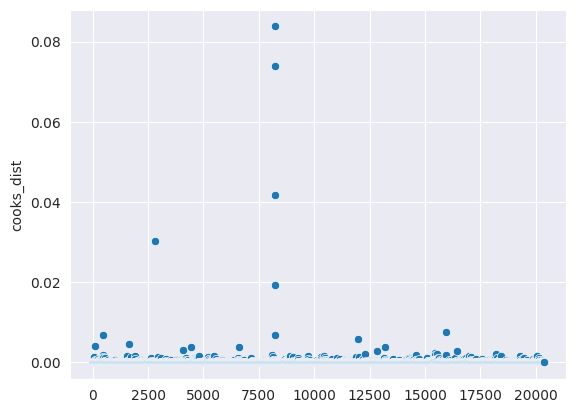

In [ ]:
sns.scatterplot(y = 'cooks_dist', x = range(20360), data = X)

In [ ]:
data4_new = data4[~data4.index.isin(influential_observations)]

In [ ]:
data4_new

,housing_median_age,median_income,median_house_value,rooms_per_bedroom,population_per_household,distance_from_centroid,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
0,41.0,8.3252,452600.0,6.821705,2.555556,3.483001,0,0,1,0
1,21.0,8.3014,358500.0,6.418626,2.109842,3.462466,0,0,1,0
2,52.0,7.2574,352100.0,7.721053,2.802260,3.471400,0,0,1,0
3,52.0,5.6431,341300.0,5.421277,2.547945,3.479098,0,0,1,0
4,52.0,3.8462,342200.0,5.810714,2.181467,3.479098,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...
20355,25.0,1.5603,78100.0,4.451872,2.560606,4.137568,1,0,0,0
20356,18.0,2.5568,77100.0,4.646667,3.122807,4.192350,1,0,0,0
20357,17.0,1.7000,92300.0,4.647423,2.325635,4.141175,1,0,0,0
20358,18.0,1.8672,84700.0,4.547677,2.123209,4.182032,1,0,0,0


In [ ]:
X = data4_new.drop(['median_house_value'], axis = 1)  # Independent variable
y = data4_new['median_house_value']  # Dependent variable

X = sm.add_constant(X)  # Add a constant term (intercept)

model = sm.OLS(y, X).fit()
X.head()

,const,housing_median_age,median_income,rooms_per_bedroom,population_per_household,distance_from_centroid,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
0,1.0,41.0,8.3252,6.821705,2.555556,3.483001,0,0,1,0
1,1.0,21.0,8.3014,6.418626,2.109842,3.462466,0,0,1,0
2,1.0,52.0,7.2574,7.721053,2.802260,3.471400,0,0,1,0
3,1.0,52.0,5.6431,5.421277,2.547945,3.479098,0,0,1,0
4,1.0,52.0,3.8462,5.810714,2.181467,3.479098,0,0,1,0


In [ ]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:     median_house_value   R-squared:                       0.750
Model:                            OLS   Adj. R-squared:                  0.750
Method:                 Least Squares   F-statistic:                     7217.
Date:                Fri, 06 Oct 2023   Prob (F-statistic):               0.00
Time:                        10:42:13   Log-Likelihood:            -2.3607e+05
No. Observations:               19242   AIC:                         4.721e+05
Df Residuals:                   19233   BIC:                         4.722e+05
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const                       1.922e+05   2941.671     65.321      0.000    1.86e+05    1.98e+05
housing_median_age           865.8480     32.655     26.515      0.000     801.842     929.854
median_income               4.876e+04    396.812    122.890      0.000     4.8e+04    4.95e+04
rooms_per_bedroom          -1.502e+04    569.518    -26.368      0.000   -1.61e+04   -1.39e+04
population_per_household   -3.225e+04    559.150    -57.684      0.000   -3.34e+04   -3.12e+04
distance_from_centroid     -6895.6930    397.880    -17.331      0.000   -7675.573   -6115.813
ocean_proximity_INLAND     -5.731e+04    999.918    -57.314      0.000   -5.93e+04   -5.53e+04
ocean_proximity_ISLAND       1.99e-11   5.73e-13     34.704      0.000    1.88e-11     2.1e-11
ocean_proximity_NEAR BAY   -1893.3713   1396.128     -1.356      0.175   -4629.904     843.162
ocean_proximity_NEAR OCEAN  1.148e+04   1245.225      9.216      0.000    9035.560    1.39e+04
==============================================================================
Omnibus:                     1164.537   Durbin-Watson:                   1.075
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1558.533
Skew:                           0.559   Prob(JB):                         0.00
Kurtosis:                       3.833   Cond. No.                     5.26e+17
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 7.01e-29. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [ ]:
while True:
    max_p_value = model.pvalues.drop('const').max()
    if max_p_value > 0.05:
        feature_to_remove = model.pvalues.idxmax()
        X = X.drop(columns=feature_to_remove)
        model = sm.OLS(y, X).fit()
    else:
        break


In [ ]:
final_model = model
print(final_model.summary())


                            OLS Regression Results                            
Dep. Variable:     median_house_value   R-squared:                       0.750
Model:                            OLS   Adj. R-squared:                  0.750
Method:                 Least Squares   F-statistic:                     8247.
Date:                Fri, 06 Oct 2023   Prob (F-statistic):               0.00
Time:                        10:42:14   Log-Likelihood:            -2.3607e+05
No. Observations:               19242   AIC:                         4.721e+05
Df Residuals:                   19234   BIC:                         4.722e+05
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const               

/usr/local/lib/python3.10/dist-packages/statsmodels/regression/linear_model.py:1965: RuntimeWarning: divide by zero encountered in double_scalars
  return np.sqrt(eigvals[0]/eigvals[-1])


# **Model Fitting 3 : after removing influential observation**

In [ ]:
X = data4_new.drop(['median_house_value'], axis = 1)  # Independent variable
y = data4_new['median_house_value']  # Dependent variable
Y_transformed, lambda_value = boxcox(y)
X_train, X_test, Y_train, Y_test = train_test_split(X,Y_transformed,test_size = 0.3, random_state=3)
model3 = LinearRegression()
model3.fit(X_train, Y_train)

mse1 = mean_squared_error(Y_train, model3.predict(X_train))
R2a = r2_score(Y_train, model3.predict(X_train))
print(f" R squared for trained data is {R2a} and MSE is {mse1}")
mse2 = mean_squared_error(Y_train, model3.predict(X_train))
R2b = r2_score(Y_test, model3.predict(X_test))
print(f" R squared for test data is {R2b} and MSE is {mse2}")

 R squared for trained data is 0.7481741015345822 and MSE is 3.8675918726813427
 R squared for test data is 0.7460707719531448 and MSE is 3.8675918726813427


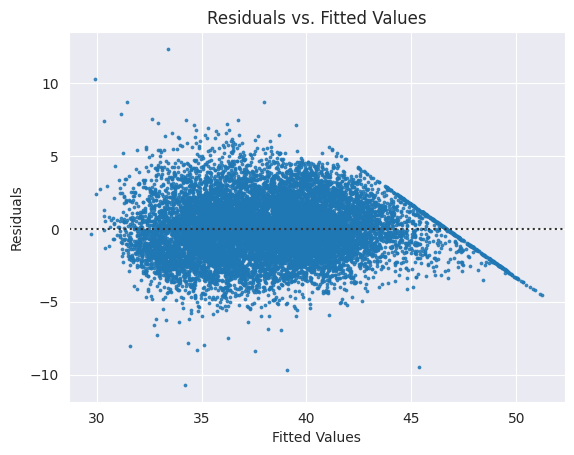

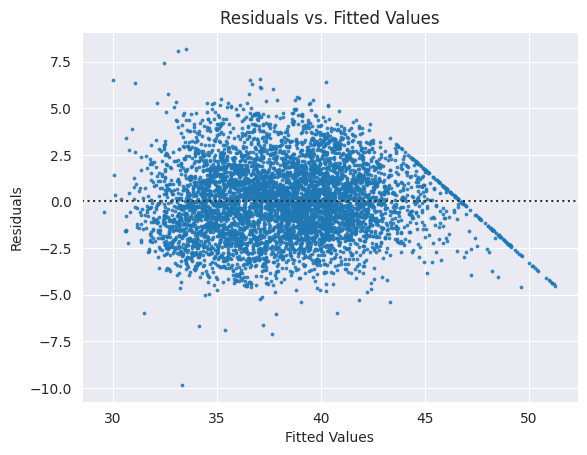

6.989896242350084e-16


0.0066028608956243415

In [ ]:
residuals1 = Y_train - model3.predict(X_train)
residuals2 = Y_test - model3.predict(X_test)

sns.residplot(x = model3.predict(X_train), y= residuals1, scatter_kws={'s': 3})
plt.xlabel("Fitted Values")
plt.ylabel("Residuals")
plt.title("Residuals vs. Fitted Values")
plt.show()
sns.residplot(x = model3.predict(X_test), y= residuals2, scatter_kws={'s': 3})
plt.xlabel("Fitted Values")
plt.ylabel("Residuals")
plt.title("Residuals vs. Fitted Values")
plt.show()
print(residuals1.mean())
residuals2.mean()

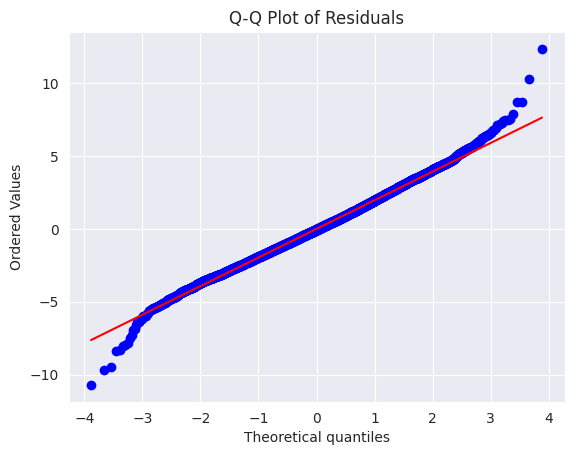

In [ ]:
from scipy.stats import probplot

probplot(residuals1, dist="norm", plot=plt)
plt.title("Q-Q Plot of Residuals")
plt.show()

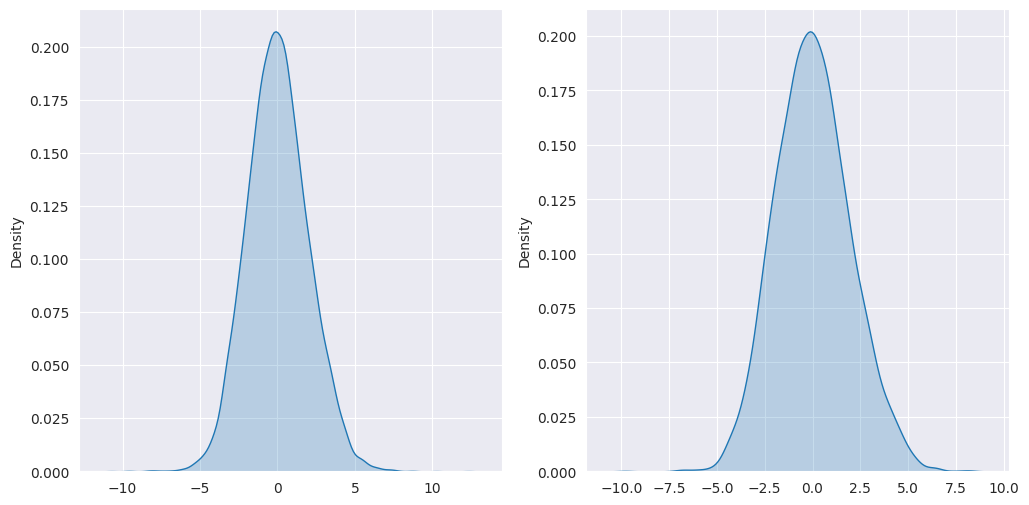

In [ ]:
plt.figure(figsize=(12,6))

plt.subplot(1,2,1)
sns.kdeplot(residuals1, fill = True)
plt.subplot(1,2,2)
sns.kdeplot(residuals2, fill = True)
plt.show()

# **Model Fitting 3**

In [ ]:
data3 = pd.get_dummies(data2, columns = ['ocean_proximity'], drop_first = True)

In [ ]:
X = data3.drop(['median_house_value'], axis =1)
Y = data3['median_house_value']
from scipy.stats import boxcox
Y_transformed, lambda_value = boxcox(Y)
X

,housing_median_age,median_income,rooms_per_bedroom,population_per_household,distance_from_centroid,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
0,41.0,8.3252,6.821705,2.555556,3.483001,0,0,1,0
1,21.0,8.3014,6.418626,2.109842,3.462466,0,0,1,0
2,42.0,2.0804,3.842105,2.026891,3.480455,0,0,1,0
3,50.0,2.1250,3.957597,2.640152,3.486808,0,0,1,0
4,50.0,1.9911,4.920879,2.362768,3.480455,0,0,1,0
...,...,...,...,...,...,...,...,...,...
18435,25.0,1.5603,4.451872,2.560606,4.137568,1,0,0,0
18436,18.0,2.5568,4.646667,3.122807,4.192350,1,0,0,0
18437,17.0,1.7000,4.647423,2.325635,4.141175,1,0,0,0
18438,18.0,1.8672,4.547677,2.123209,4.182032,1,0,0,0


In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y_transformed,test_size = 0.3, random_state=4)
model2 = LinearRegression()
model2.fit(X_train, Y_train)

LinearRegression()

In [ ]:
# now we calculate the MSE and R^2 to evaluate the efficeiency of our model
mse = mean_squared_error(Y_train, model2.predict(X_train))
R2 = r2_score(Y_train, model2.predict(X_train))
print(f" R squared is {R2} and MSE is {mse}")

 R squared is 0.6788613743041578 and MSE is 17.03787600629575


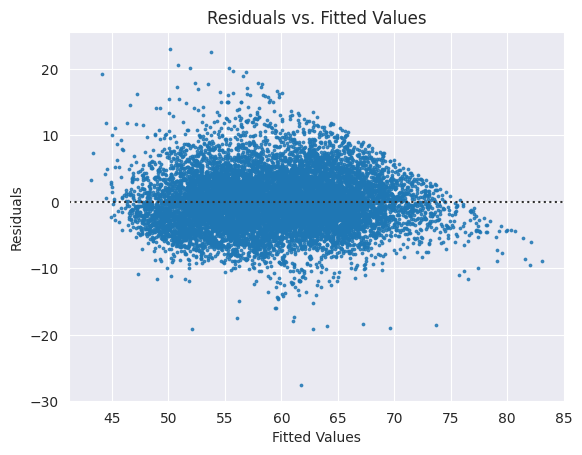

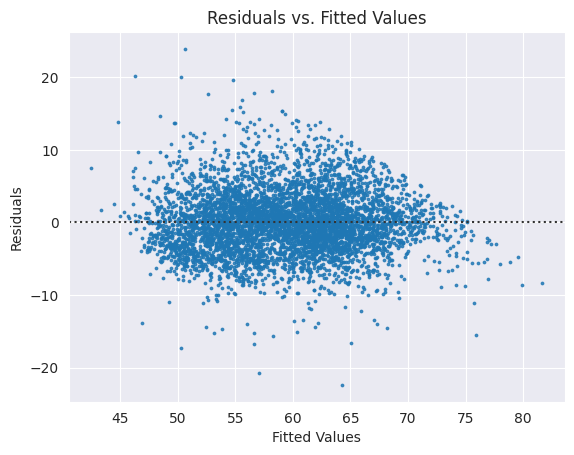

NameError: ignored

In [ ]:
residuals2 = Y_train - model2.predict(X_train)
residuals3 = Y_test - model2.predict(X_test)

plt.subplot()
sns.residplot(x = model2.predict(X_train), y= residuals2, scatter_kws={'s': 3})
plt.xlabel("Fitted Values")
plt.ylabel("Residuals")
plt.title("Residuals vs. Fitted Values")
plt.show()
sns.residplot(x = model2.predict(X_test), y= residuals3, scatter_kws={'s': 3})
plt.xlabel("Fitted Values")
plt.ylabel("Residuals")
plt.title("Residuals vs. Fitted Values")
plt.show()
residuals.mean()
residuals.mean()

In [ ]:
from scipy.stats import probplot

probplot(residuals2, dist="norm", plot=plt)
plt.title("Q-Q Plot of Residuals")
plt.show()

NOw I WILL TRY TO DO MINMAX SCALING

In [ ]:
# Select numerical columns
numerical_columns = data2.select_dtypes(include=['float64'])
numerical_columns = numerical_columns.drop(['median_house_value'], axis = 1)
numerical_columns_scaled = scaler.fit_transform(numerical_columns)
df4 = pd.DataFrame(numerical_columns_scaled)
df4.shape

In [ ]:
df4['ocean'] = data2['ocean_proximity']

In [ ]:
df4.head(10)

In [ ]:
df5 = pd.get_dummies(df4, columns = ['ocean'], drop_first = True)
df5

In [ ]:
df5 = df5.rename(columns={0: 'housing_median_age', 1: 'median_income', 2 : 'rooms_per_bedroom', 3 : 'population_per_household', 4 : 'distance_from_centroid' })

In [ ]:
X = df5
Y = data2['median_house_value']

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size = 0.3, random_state=3)
model = LinearRegression()
model.fit(X_train, Y_train)

In [ ]:
# now we calculate the MSE and R^2 to evaluate the efficeiency of our model
mse1 = mean_squared_error(Y_train, model.predict(X_train))
R2a = r2_score(Y_train, model.predict(X_train))
print(f" R squared for trained data is {R2a} and MSE is {mse1}")
mse2 = mean_squared_error(Y_train, model.predict(X_train))
R2b = r2_score(Y_test, model.predict(X_test))
print(f" R squared for test data is {R2b} and MSE is {mse2}")

# Simple Linear Regression

In [ ]:
data1

In [ ]:
# Select numerical columns
num_col = data1.select_dtypes(include=['float64'])

In [ ]:
sns.scatterplot(x='median_income', y = 'median_house_value', data = num_col ,size = 5, palette="husl")

In [ ]:
X = data4_new[['median_income']]
Y = data4_new[['median_house_value']]
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size = 0.3, random_state=42)
model = LinearRegression()
model.fit(X_train, Y_train)
# now we calculate the MSE and R^2 to evaluate the efficeiency of our model
mse1 = mean_squared_error(Y_train, model.predict(X_train))
R2a = r2_score(Y_train, model.predict(X_train))
print(f" R squared for trained data is {R2a} and MSE is {mse1}")
mse2 = mean_squared_error(Y_test, model.predict(X_test))
R2b = r2_score(Y_test, model.predict(X_test))
print(f" R squared for test data is {R2b} and MSE is {mse2}")
residuals1 = Y_train - model.predict(X_train)
residuals2 = Y_test - model.predict(X_test)
plt.figure(figsize = (15,6))
plt.subplot(1,2,1)
sns.residplot(x= model.predict(X_train), y= residuals1, scatter_kws={'s': 3})
plt.xlabel("Fitted Values")
plt.ylabel("Residuals")
plt.title("Residuals vs. Fitted Values trained data")
plt.subplot(1,2,2)
sns.residplot(x= model.predict(X_test), y= residuals2, scatter_kws={'s': 3})
plt.xlabel("Fitted Values")
plt.ylabel("Residuals")
plt.title("Residuals vs. Fitted Values test data")
plt.show()
print(residuals1.mean())
print(residuals2.mean())
from scipy.stats import probplot

probplot(residuals1['median_house_value'], dist="norm", plot=plt)
plt.title("Q-Q Plot of Residuals")
plt.show()

In [ ]:
X = data4_new[['rooms_per_bedroom']]
Y = data4_new[['median_house_value']]
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size = 0.3, random_state=42)
model = LinearRegression()
model.fit(X_train, Y_train)
# now we calculate the MSE and R^2 to evaluate the efficeiency of our model
mse1 = mean_squared_error(Y_train, model.predict(X_train))
R2a = r2_score(Y_train, model.predict(X_train))
print(f" R squared for trained data is {R2a} and MSE is {mse1}")
mse2 = mean_squared_error(Y_test, model.predict(X_test))
R2b = r2_score(Y_test, model.predict(X_test))
print(f" R squared for test data is {R2b} and MSE is {mse2}")
residuals1 = Y_train - model.predict(X_train)
residuals2 = Y_test - model.predict(X_test)
plt.figure(figsize = (15,6))
plt.subplot(1,2,1)
sns.residplot(x= model.predict(X_train), y= residuals1, scatter_kws={'s': 3})
plt.xlabel("Fitted Values")
plt.ylabel("Residuals")
plt.title("Residuals vs. Fitted Values trained data")
plt.subplot(1,2,2)
sns.residplot(x= model.predict(X_test), y= residuals2, scatter_kws={'s': 3})
plt.xlabel("Fitted Values")
plt.ylabel("Residuals")
plt.title("Residuals vs. Fitted Values test data")
plt.show()
print(residuals1.mean())
print(residuals2.mean())
from scipy.stats import probplot

probplot(residuals1['median_house_value'], dist="norm", plot=plt)
plt.title("Q-Q Plot of Residuals")
plt.show()

In [ ]:
X = data4_new[['population_per_household']]
Y = data4_new[['median_house_value']]
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size = 0.3, random_state=42)
model = LinearRegression()
model.fit(X_train, Y_train)
# now we calculate the MSE and R^2 to evaluate the efficeiency of our model
mse1 = mean_squared_error(Y_train, model.predict(X_train))
R2a = r2_score(Y_train, model.predict(X_train))
print(f" R squared for trained data is {R2a} and MSE is {mse1}")
mse2 = mean_squared_error(Y_test, model.predict(X_test))
R2b = r2_score(Y_test, model.predict(X_test))
print(f" R squared for test data is {R2b} and MSE is {mse2}")
residuals1 = Y_train - model.predict(X_train)
residuals2 = Y_test - model.predict(X_test)
plt.figure(figsize = (15,6))
plt.subplot(1,2,1)
sns.residplot(x= model.predict(X_train), y= residuals1, scatter_kws={'s': 3})
plt.xlabel("Fitted Values")
plt.ylabel("Residuals")
plt.title("Residuals vs. Fitted Values trained data")
plt.subplot(1,2,2)
sns.residplot(x= model.predict(X_test), y= residuals2, scatter_kws={'s': 3})
plt.xlabel("Fitted Values")
plt.ylabel("Residuals")
plt.title("Residuals vs. Fitted Values test data")
plt.show()
print(residuals1.mean())
print(residuals2.mean())
from scipy.stats import probplot

probplot(residuals1['median_house_value'], dist="norm", plot=plt)
plt.title("Q-Q Plot of Residuals")
plt.show()

In [ ]:
X = data4_new[['distance_from_centroid']]
Y = data4_new[['median_house_value']]
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size = 0.3, random_state=42)
model = LinearRegression()
model.fit(X_train, Y_train)
# now we calculate the MSE and R^2 to evaluate the efficeiency of our model
mse1 = mean_squared_error(Y_train, model.predict(X_train))
R2a = r2_score(Y_train, model.predict(X_train))
print(f" R squared for trained data is {R2a} and MSE is {mse1}")
mse2 = mean_squared_error(Y_test, model.predict(X_test))
R2b = r2_score(Y_test, model.predict(X_test))
print(f" R squared for test data is {R2b} and MSE is {mse2}")
residuals1 = Y_train - model.predict(X_train)
residuals2 = Y_test - model.predict(X_test)
plt.figure(figsize = (15,6))
plt.subplot(1,2,1)
sns.residplot(x= model.predict(X_train), y= residuals1, scatter_kws={'s': 3})
plt.xlabel("Fitted Values")
plt.ylabel("Residuals")
plt.title("Residuals vs. Fitted Values trained data")
plt.subplot(1,2,2)
sns.residplot(x= model.predict(X_test), y= residuals2, scatter_kws={'s': 3})
plt.xlabel("Fitted Values")
plt.ylabel("Residuals")
plt.title("Residuals vs. Fitted Values test data")
plt.show()
print(residuals1.mean())
print(residuals2.mean())
from scipy.stats import probplot

probplot(residuals1['median_house_value'], dist="norm", plot=plt)
plt.title("Q-Q Plot of Residuals")
plt.show()